In [49]:
# Set seed for reproducibility
import random; random.seed(53)

# Import all we need from sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

In [50]:
import pandas as pd

# Load data
tweet_df = pd.read_csv('tweets_hw9_tidy.csv')

# Create target
y = tweet_df.author

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(tweet_df['status'], y, test_size=0.33, 
                 random_state=53)

In [51]:
# Initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words='english', 
                                   min_df=0.05, max_df=0.9)

# Create count train and test variables
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', 
                                   min_df=0.05, max_df=0.9)

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [52]:
tfidf_nb = MultinomialNB()
tfidf_nb.fit(tfidf_train, y_train)
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)
tfidf_nb_score = metrics.accuracy_score(y_test, tfidf_nb_pred)

count_nb = MultinomialNB()
count_nb.fit(count_train, y_train)
count_nb_pred = count_nb.predict(count_test)
count_nb_score = metrics.accuracy_score(y_test, count_nb_pred)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)
print('NaiveBayes Count Score: ', count_nb_score)

NaiveBayes Tfidf Score:  0.6590909090909091
NaiveBayes Count Score:  0.6742424242424242


Confusion matrix, without normalization
Confusion matrix, without normalization


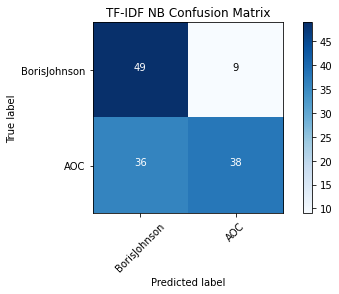

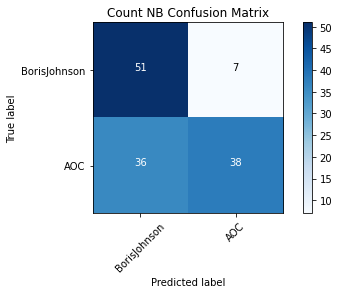

In [53]:
%matplotlib inline
from helper_functions import plot_confusion_matrix


tfidf_nb_cm = metrics.confusion_matrix(y_test, tfidf_nb_pred, labels=['BorisJohnson', 'AOC'])
count_nb_cm = metrics.confusion_matrix(y_test, count_nb_pred, labels=['BorisJohnson', 'AOC'])

plot_confusion_matrix(tfidf_nb_cm, classes=['BorisJohnson', 'AOC'], title="TF-IDF NB Confusion Matrix")

plot_confusion_matrix(count_nb_cm, classes=['BorisJohnson', 'AOC'], title="Count NB Confusion Matrix", figure=1)

LinearSVC Score:   0.720
Confusion matrix, without normalization


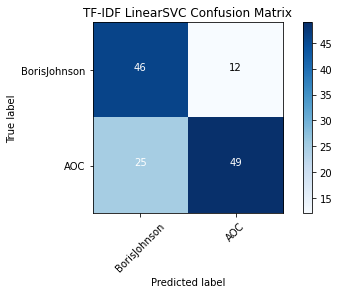

In [54]:
tfidf_svc = LinearSVC()
tfidf_svc.fit(tfidf_train, y_train)
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)
tfidf_svc_score = metrics.accuracy_score(y_test, tfidf_svc_pred)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

svc_cm = metrics.confusion_matrix(y_test, tfidf_svc_pred, labels=['BorisJohnson', 'AOC'])
plot_confusion_matrix(svc_cm, classes=['BorisJohnson', 'AOC'], title="TF-IDF LinearSVC Confusion Matrix")


In [78]:
from helper_functions import plot_and_return_top_features

from pprint import pprint
top_features = plot_and_return_top_features(tfidf_svc, tfidf_vectorizer)
pprint(top_features)

NameError: name 'x' is not defined

In [77]:
bj_tweet = "Herd immunity will save us" 
aoc_tweet = "AstraZeneca sucks" 

bj_tweet_vectorized = tfidf_vectorizer.transform([bj_tweet])
aoc_tweet_vectorized = tfidf_vectorizer.transform([aoc_tweet])

bj_tweet_pred = tfidf_svc.predict(bj_tweet_vectorized)
aoc_tweet_pred = tfidf_svc.predict(aoc_tweet_vectorized)

print("Predicted Boris Johnson tweet", bj_tweet_pred)
print("Predicted AOC tweet", aoc_tweet_pred)


#BJ Tweets
#The UK is a great country
#The Duke lives in our hearts 
#Everyone is eligible for a vaccine

#AOC Tweets
#Climate Change is an issue 
#God save the Queen
#Gender gap is real
#Happy Mothers day
#Happy Fathers day
#Pfizer is the best
#Minimum wage is a priority
#AstraZeneca is safe

Predicted Boris Johnson tweet ['AOC']
Predicted AOC tweet ['AOC']
